In [1]:
import geopandas as gpd
from shapely.geometry import MultiPolygon, Polygon
import sentinelsat
from sentinelsat import SentinelAPI
import folium
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Bisogna essere registrati sul sito di copernicus per poter utilizzare questa API
user = '' #nome utente
password = '' #password

api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus')

In [3]:
#SHP da utilizzare come bbox
bbox=gpd.read_file('C:/Users/Utente/prova/bbox.shp')

In [4]:
#mostra il bbox sulla mappa
map = folium.Map([44.53,11.9], zoom_start=8)
folium.GeoJson(bbox).add_to(map)
map

In [5]:
#prendi la geometria del bbox
footprint = None
for i in bbox['geometry']:
    footprint = i

In [6]:
#trova le immigini passando i parametri desiderati
products = api.query(footprint,
                     date = ('20200504', '20200628'), #range di date da cercare
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-2A',
                     cloudcoverpercentage = (0, 10)) #percentuale di nuvolosità desiderata, 10% in qusto caso

e2c955e7-7554-4369-a7ad-b73ec1513905    Annotation(10.9533, 44.6422, 'e2c955e7-7554-43...
c2cf4b17-3a23-454e-a8e3-f4c1ab1717c2    Annotation(12.2121, 44.6137, 'c2cf4b17-3a23-45...
711af836-befe-4648-bb90-5b5bd2eab5b2    Annotation(12.45, 44.5815, '711af836-befe-4648...
ebbb20af-6168-4218-a8c6-c225a0f207d8    Annotation(12.2121, 44.6137, 'ebbb20af-6168-42...
59aeacff-a1e9-4dd3-9853-66f1a568ddd1    Annotation(10.9533, 44.6422, '59aeacff-a1e9-4d...
9bca3003-b71f-4024-b03e-9a7ab376ade8    Annotation(12.4529, 44.5813, '9bca3003-b71f-40...
c36bb7ec-fc52-437e-aae7-ee2d35f9f807    Annotation(12.4465, 44.5818, 'c36bb7ec-fc52-43...
25771ec4-223a-47ed-a7ab-6f53e5d9e9cc    Annotation(10.9533, 44.6422, '25771ec4-223a-47...
dtype: object

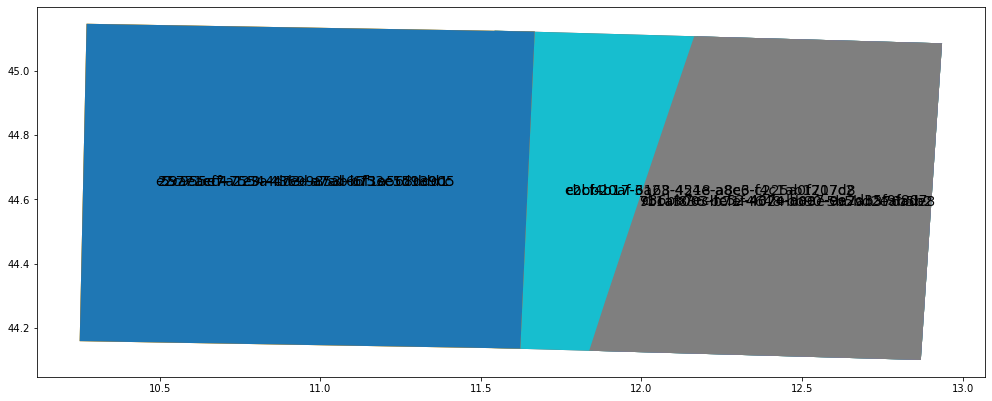

In [71]:
#stampa i tile trovati 
tile = api.to_geodataframe(products)
ax = tile.plot(column='uuid',figsize=(17, 17))
tile.apply(lambda x: ax.annotate(text=x.uuid, xy=x.geometry.centroid.coords[0],size=20,ha='center', fontsize='14'),axis=1)

#il testo sembra stampato male, ma in realtà sono i nomi dei tile che sono sovrapposti uno sull'altro

<AxesSubplot:>

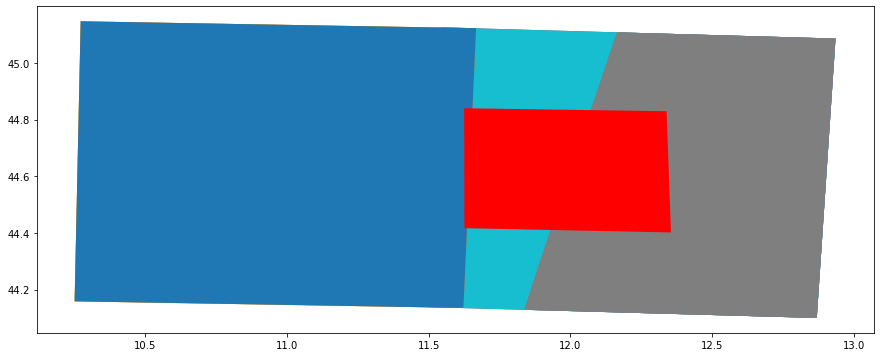

In [68]:
#tile + bbox
f, ax = plt.subplots(1,figsize=(15,15))
tile.plot(ax=ax,column='uuid',cmap=None)
bbox.plot(ax=ax,color='red')

In [69]:
#crea un GDF e lo ordina in base alla % di nuvolosità
tile_gdf = api.to_geodataframe(products)
tile_gdf_sorted = granule_gdf.sort_values(['cloudcoverpercentage'], ascending=[True])
tile_gdf_sorted

,title,link,link_alternative,link_icon,summary,beginposition,endposition,ingestiondate,orbitnumber,relativeorbitnumber,...,size,s2datatakeid,producttype,platformidentifier,orbitdirection,platformserialidentifier,processinglevel,identifier,uuid,geometry
59aeacff-a1e9-4dd3-9853-66f1a568ddd1,S2B_MSIL2A_20200622T100559_N0214_R022_T32TPQ_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-06-22T10:05:59.024Z, Instrument: MS...",2020-06-22 10:05:59.024,2020-06-22 10:05:59.024,2020-06-22 19:49:23.296,17208,22,...,1.13 GB,GS2B_20200622T100559_017208_N02.14,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_MSIL2A_20200622T100559_N0214_R022_T32TPQ_2...,59aeacff-a1e9-4dd3-9853-66f1a568ddd1,"MULTIPOLYGON (((11.62274 44.13525, 11.66762 45..."
c2cf4b17-3a23-454e-a8e3-f4c1ab1717c2,S2A_MSIL2A_20200627T101031_N0214_R022_T32TQQ_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-06-27T10:10:31.024Z, Instrument: MS...",2020-06-27 10:10:31.024,2020-06-27 10:10:31.024,2020-06-27 17:55:25.745,26188,22,...,1.01 GB,GS2A_20200627T101031_026188_N02.14,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_MSIL2A_20200627T101031_N0214_R022_T32TQQ_2...,c2cf4b17-3a23-454e-a8e3-f4c1ab1717c2,"MULTIPOLYGON (((12.86999 44.09977, 12.93610 45..."
c36bb7ec-fc52-437e-aae7-ee2d35f9f807,S2A_MSIL2A_20200525T100031_N0214_R122_T32TQQ_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-05-25T10:00:31.024Z, Instrument: MS...",2020-05-25 10:00:31.024,2020-05-25 10:00:31.024,2020-05-25 17:38:03.648,25716,122,...,627.31 MB,GS2A_20200525T100031_025716_N02.14,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_MSIL2A_20200525T100031_N0214_R122_T32TQQ_2...,c36bb7ec-fc52-437e-aae7-ee2d35f9f807,"MULTIPOLYGON (((12.86999 44.09977, 12.93610 45..."
e2c955e7-7554-4369-a7ad-b73ec1513905,S2A_MSIL2A_20200627T101031_N0214_R022_T32TPQ_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-06-27T10:10:31.024Z, Instrument: MS...",2020-06-27 10:10:31.024,2020-06-27 10:10:31.024,2020-06-27 18:07:06.113,26188,22,...,1.12 GB,GS2A_20200627T101031_026188_N02.14,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_MSIL2A_20200627T101031_N0214_R022_T32TPQ_2...,e2c955e7-7554-4369-a7ad-b73ec1513905,"MULTIPOLYGON (((11.62274 44.13525, 11.66762 45..."
9bca3003-b71f-4024-b03e-9a7ab376ade8,S2B_MSIL2A_20200619T100029_N0214_R122_T32TQQ_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-06-19T10:00:29.024Z, Instrument: MS...",2020-06-19 10:00:29.024,2020-06-19 10:00:29.024,2020-06-19 20:17:03.923,17165,122,...,607.86 MB,GS2B_20200619T100029_017165_N02.14,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_MSIL2A_20200619T100029_N0214_R122_T32TQQ_2...,9bca3003-b71f-4024-b03e-9a7ab376ade8,"MULTIPOLYGON (((12.86999 44.09977, 12.93610 45..."
25771ec4-223a-47ed-a7ab-6f53e5d9e9cc,S2B_MSIL2A_20200523T100559_N0214_R022_T32TPQ_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-05-23T10:05:59.024Z, Instrument: MS...",2020-05-23 10:05:59.024,2020-05-23 10:05:59.024,2020-05-23 20:16:48.199,16779,22,...,1.12 GB,GS2B_20200523T100559_016779_N02.14,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_MSIL2A_20200523T100559_N0214_R022_T32TPQ_2...,25771ec4-223a-47ed-a7ab-6f53e5d9e9cc,"MULTIPOLYGON (((11.62274 44.13525, 11.66762 45..."
ebbb20af-6168-4218-a8c6-c225a0f207d8,S2B_MSIL2A_20200622T100559_N0214_R022_T32TQQ_2...,https://scihub.cop

In [65]:
len(granule_gdf_sorted)

8

In [ ]:
#scarica il primo tile
api.download(['59aeacff-a1e9-4dd3-9853-66f1a568ddd1'])

In [ ]:
import zipfile

#estrae la cartella della zip e la espota nel path desiderato
with zipfile.ZipFile('C:/Users/Utente/S2B_MSIL2A_20200622T100559_N0214_R022_T32TPQ_20200622T134211.zip', 'r') as zip_ref:
    zip_ref.extractall('C:/Users/Utente/Desktop/2B_MSIL2A_20200622T100559_N0214_R022_T32TPQ_20200622T134211')